O propósito desse notebook é a hospedagem de funções que serão utilizados nos outros notebooks desse projeto, tal como uma breve explicação de seu funcionamento

___
### Imports iniciais

In [1]:
import pandas as pd
import numpy as np

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [18]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *

___
### Dados

In [5]:
Dados=pd.read_csv('cars_Brazil_data.csv')

In [6]:
#separa carros com mais de 500 ocorrências no Dataframe
Mais_de_500 = Dados['nome'].value_counts() > 500
Mais_de_500 = list(Mais_de_500.loc[Mais_de_500].index)
Dados = Dados.loc[Dados['nome'].isin(Mais_de_500),:];

#### Separando 10% do Dataframe global para treinamento
Nota para si mesmo: Estudar se faz sentido ou não eliminar as colunas nome do carro e marca 
- (Observação inicial 2 de junho: Não parece fazer)

In [7]:
# separa características dos carros, que podem ser relevantes no contexto de uma regrssão e \n
# elimina as características irrelevantes assim como a coluna com resultado esperado;
inputs = Dados.drop(columns=["valor"])

#separa o resultado esperado, devemos calcular a previsão mais próxima a eles;
target = Dados["valor"]

#separando dataframes teste e treino
X_train,X_test,Y_train,Y_test=tts(inputs,target,test_size=0.9)

#### Separando 10% do Dataframe de cada carro para treinamento:

In [8]:
def Separa_dataframe_por_carro(x):
    Carro = {}
    Carro_inputs  = {}
    Carro_target  = {}
    Carro_X_train = {}
    Carro_X_test  = {}
    Carro_Y_train = {}
    Carro_Y_test  = {}

    Carro[x] = Dados.loc[Dados['nome'] == x]
        
    Carro_inputs[x] = Carro[x].drop(columns=["valor"])
    Carro_target[x] = Carro[x]["valor"]
        
    #separando dataframes teste e treino
    Carro_X_train[x],Carro_X_test[x],Carro_Y_train[x],Carro_Y_test[x]=tts(Carro_inputs[x],Carro_target[x],test_size=0.9)
    return (Carro_X_train[x],Carro_X_test[x],Carro_Y_train[x],Carro_Y_test[x])

In [9]:
#interact(Separa_dataframe_por_carro, x = Mais_de_500);
#Problema: Tudo é chevrolet onix, em todas as colunas --------------------------#fixed in 3/06
#Problema 2: toda vez que há uma interação ele gera uma nova seed com valores diferentes
#Possível Solução para o problema 2: salvar seeds fixas e usar o interact para alternar entre elas

___
### Funções de Filtragem e Separação dos dados

In [10]:
def Separa_por_veículo(x):
    return Dados.loc[Dados['nome'] == x]

In [11]:
def Dispersão_individual_por_veículo(x):
    gráfico_de_dispersão  = plt.scatter (Dados.loc[Dados['nome'] == x]['valor'],Dados.loc[Dados['nome'] == x]['km_rodados'])
    return gráfico_de_dispersão

In [23]:
#Função incompleta(2 de junho):
#elementos restantes, definir cores sem repetição (criar um np.arange de cores???)

def Dispersão_global_por_veículo(lista):
    for x in lista:
        plt.scatter (Dados.loc[Dados['nome'] == x]['valor'],Dados.loc[Dados['nome'] == x]['km_rodados'],
                 label=x) 
        #Acrescentar um sistema de arange de cores (colormap?)
        plt.legend();

___
### Funções processadas do sklearn

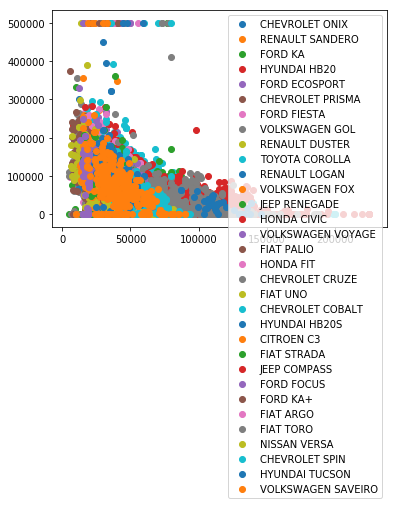

In [24]:
Dispersão_global_por_veículo(Mais_de_500)